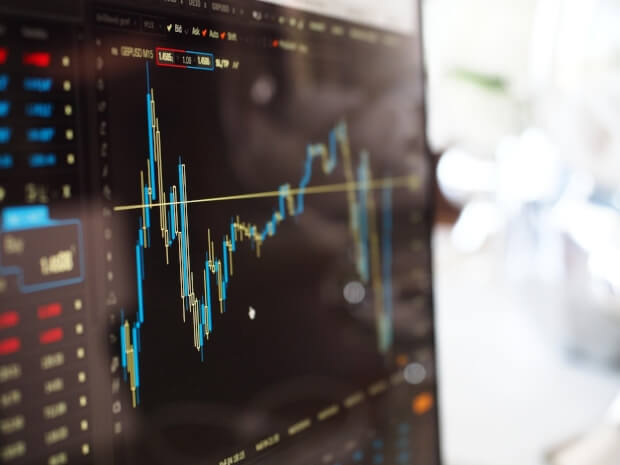

# **Stock Sentiment Analysis Finance Project**

# Stock Price Prediction Using Numerical And Textual Analysis.

In this notebook, we will use stock price data of **S&P500** from 2012 till the end of 2023 and news headlines from **"New York Times"** to build a model to predict stock prices. The additional news headlines will be used for sentiment analysis and then merged with the stock price dataset.

### Game Plan :

Primary these are my plan of action :

1. Data Fetching (In Separate Notebooks)
2. Data Visualization
3. Merge Data
4. Sentiment Analysis
5. Scaling , normalization
6. Modelling
7. Prediction and Deliverables



# **Importing necessary dependencies**

In [16]:
!pip install vaderSentiment
!pip install emoji
!pip install statsmodels

In [17]:
import csv
from textblob import TextBlob
import re
from collections import defaultdict
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import yfinance as yf
import os
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import emoji
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
import string
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
######################################################
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
plt.style.use('ggplot')
######################################################
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import time
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
import warnings
warnings.filterwarnings("ignore")

# **Loading of Datasets and Visualization**

In [19]:
df=pd.read_csv('final_dataset.csv')

In [20]:
df

,Date,Headlines,Open,High,Low,Close,Volume,Dividends,Stock Splits,Yesterday,...,Momentum_250,RollingMean_500,RollingStd_500,Momentum_500,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2012-01-03,democrat becom target occupi protest european ...,12.378494,12.472224,12.366399,12.433825,302220800,0.0,0.0,12.245458,...,2.335102,9.467322,1.840696,6.024462,0.443480,0.112125,-0.9790,0.129,0.775,0.095
1,2012-01-04,decod iowa caucu coverag explain tonight poll ...,12.396637,12.538141,12.374867,12.500648,260022000,0.0,0.0,12.433825,...,2.410088,9.479618,1.840383,6.147826,0.409932,0.119099,-0.9821,0.106,0.814,0.080
2,2012-01-05,bachmann next decis whether run reelect questi...,12.546302,12.655149,12.477363,12.639427,271269600,0.0,0.0,12.500648,...,2.476606,9.492336,1.840203,6.358870,0.440050,0.147485,-0.9783,0.133,0.767,0.100
3,2012-01-06,ron paul move chart kelli clarkson may prove m...,12.692040,12.782142,12.675410,12.771560,318292800,0.0,0.0,12.639427,...,2.417348,9.505140,1.840702,6.402411,0.366081,0.113129,-0.9907,0.132,0.767,0.100
4,2012-01-09,william p carey leader commerci real estat die...,12.865288,12.933318,12.739809,12.751299,394024400,0.0,0.0,12.771560,...,2.421575,9.517979,1.840914,6.419035,0.344342,0.061082,-0.9901,0.122,0.797,0.081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,2023-12-22,u prepar lift ban sale offens weapon saudi ara...,194.931260,195.160978,192.724085,193.353287,37122800,0.0,0.0,194.431885,...,62.393326,162.435817,17.730974,16.314606,0.346313,0.069688,-0.9738,0.145,0.736,0.118
3013,2023-12-26,u strike iranback group iraq attack base injur...,193.363270,193.642911,192.584265,192.803986,28919300,0.0,0.0,193.353287,...,63.661545,162.467170,17.770820,15.676392,0.294114,0.046984,-0.9741,0.173,0.764,0.063
3014,2023-12-27,michael flynn rhode island hall fame inclus pr...,192.244692,193.253399,190.846467,192.903839,48087700,0.0,0.0,192.803986,...,67.724167,162.501053,17.812704,16.941437,0.405104,-0.012241,-0.9971,0.236,0.693,0.072
3015,2023-12-28,herbert kohl former wisconsin senat milwauke b...,193.892582,194.411923,192.923817,193.333298,34049900,0.0,0.0,192.903839,...,64.607986,162.537038,17.856815,17.992966,0.315618,0.021329,-0.9952,0.198,0.748,0.054


In [21]:
df.columns

Index(['Date', 'Headlines', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Dividends', 'Stock Splits', 'Yesterday', 'Tomorrow', 'Label(Up/Down)',
       'Cumu_Label(Up/Down)', 'RollingMean_2', 'RollingStd_2', 'Momentum_2',
       'RollingMean_5', 'RollingStd_5', 'Momentum_5', 'RollingMean_60',
       'RollingStd_60', 'Momentum_60', 'RollingMean_250', 'RollingStd_250',
       'Momentum_250', 'RollingMean_500', 'RollingStd_500', 'Momentum_500',
       'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral',
       'Positive'],
      dtype='object')

In [22]:
df = df[["Date","Headlines","Open", "High", "Low", "Close", "Volume" ,"Yesterday","Subjectivity", "Polarity", "Compound", "Negative", "Neutral",'RollingMean_2', 'RollingStd_2', 'Momentum_2',
       'RollingMean_5', 'RollingStd_5', 'Momentum_5', 'RollingMean_60',
       'RollingStd_60', 'Momentum_60', 'RollingMean_250', 'RollingStd_250',
       'Momentum_250', 'RollingMean_500', 'RollingStd_500', 'Momentum_500', "Positive","Label(Up/Down)"]]
df

,Date,Headlines,Open,High,Low,Close,Volume,Yesterday,Subjectivity,Polarity,...,RollingStd_60,Momentum_60,RollingMean_250,RollingStd_250,Momentum_250,RollingMean_500,RollingStd_500,Momentum_500,Positive,Label(Up/Down)
0,2012-01-03,democrat becom target occupi protest european ...,12.378494,12.472224,12.366399,12.433825,302220800,12.245458,0.443480,0.112125,...,0.401104,1.023780,11.023385,0.784609,2.335102,9.467322,1.840696,6.024462,0.095,1
1,2012-01-04,decod iowa caucu coverag explain tonight poll ...,12.396637,12.538141,12.374867,12.500648,260022000,12.433825,0.409932,0.119099,...,0.398069,1.319489,11.033026,0.787901,2.410088,9.479618,1.840383,6.147826,0.080,1
2,2012-01-05,bachmann next decis whether run reelect questi...,12.546302,12.655149,12.477363,12.639427,271269600,12.500648,0.440050,0.147485,...,0.408620,0.883487,11.042932,0.792472,2.476606,9.492336,1.840203,6.358870,0.100,1
3,2012-01-06,ron paul move chart kelli clarkson may prove m...,12.692040,12.782142,12.675410,12.771560,318292800,12.639427,0.366081,0.113129,...,0.422549,0.668514,11.052602,0.798757,2.417348,9.505140,1.840702,6.402411,0.100,0
4,2012-01-09,william p carey leader commerci real estat die...,12.865288,12.933318,12.739809,12.751299,394024400,12.771560,0.344342,0.061082,...,0.434673,0.590804,11.062288,0.804617,2.421575,9.517979,1.840914,6.419035,0.081,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,2023-12-22,u prepar lift ban sale offens weapon saudi ara...,194.931260,195.160978,192.724085,193.353287,37122800,194.431885,0.346313,0.069688,...,9.236721,23.105103,170.864818,18.123701,62.393326,162.435817,17.730974,16.314606,0.118,0
3013,2023-12-26,u strike iranback group iraq attack base injur...,193.363270,193.642911,192.584265,192.803986,28919300,193.353287,0.294114,0.046984,...,9.159457,22.037140,171.119464,17.981810,63.661545,162.467170,17.770820,15.676392,0.063,1
3014,2023-12-27,michael flynn rhode island hall fame inclus pr...,192.244692,193.253399,190.846467,192.903839,48087700,192.803986,0.405104,-0.012241,...,9.125546,19.603592,171.390361,17.796121,67.724167,162.501053,17.812704,16.941437,0.072,1
3015,2023-12-28,herbert kohl former wisconsin senat milwauke b...,193.892582,194.411923,192.923817,193.333298,34049900,192.903839,0.315618,0.021329,...,9.056463,21.379562,171.648792,17.642508,64.607986,162.537038,17.856815,17.992966,0.054,0


In [23]:
df

,Date,Headlines,Open,High,Low,Close,Volume,Yesterday,Subjectivity,Polarity,...,RollingStd_60,Momentum_60,RollingMean_250,RollingStd_250,Momentum_250,RollingMean_500,RollingStd_500,Momentum_500,Positive,Label(Up/Down)
0,2012-01-03,democrat becom target occupi protest european ...,12.378494,12.472224,12.366399,12.433825,302220800,12.245458,0.443480,0.112125,...,0.401104,1.023780,11.023385,0.784609,2.335102,9.467322,1.840696,6.024462,0.095,1
1,2012-01-04,decod iowa caucu coverag explain tonight poll ...,12.396637,12.538141,12.374867,12.500648,260022000,12.433825,0.409932,0.119099,...,0.398069,1.319489,11.033026,0.787901,2.410088,9.479618,1.840383,6.147826,0.080,1
2,2012-01-05,bachmann next decis whether run reelect questi...,12.546302,12.655149,12.477363,12.639427,271269600,12.500648,0.440050,0.147485,...,0.408620,0.883487,11.042932,0.792472,2.476606,9.492336,1.840203,6.358870,0.100,1
3,2012-01-06,ron paul move chart kelli clarkson may prove m...,12.692040,12.782142,12.675410,12.771560,318292800,12.639427,0.366081,0.113129,...,0.422549,0.668514,11.052602,0.798757,2.417348,9.505140,1.840702,6.402411,0.100,0
4,2012-01-09,william p carey leader commerci real estat die...,12.865288,12.933318,12.739809,12.751299,394024400,12.771560,0.344342,0.061082,...,0.434673,0.590804,11.062288,0.804617,2.421575,9.517979,1.840914,6.419035,0.081,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,2023-12-22,u prepar lift ban sale offens weapon saudi ara...,194.931260,195.160978,192.724085,193.353287,37122800,194.431885,0.346313,0.069688,...,9.236721,23.105103,170.864818,18.123701,62.393326,162.435817,17.730974,16.314606,0.118,0
3013,2023-12-26,u strike iranback group iraq attack base injur...,193.363270,193.642911,192.584265,192.803986,28919300,193.353287,0.294114,0.046984,...,9.159457,22.037140,171.119464,17.981810,63.661545,162.467170,17.770820,15.676392,0.063,1
3014,2023-12-27,michael flynn rhode island hall fame inclus pr...,192.244692,193.253399,190.846467,192.903839,48087700,192.803986,0.405104,-0.012241,...,9.125546,19.603592,171.390361,17.796121,67.724167,162.501053,17.812704,16.941437,0.072,1
3015,2023-12-28,herbert kohl former wisconsin senat milwauke b...,193.892582,194.411923,192.923817,193.333298,34049900,192.903839,0.315618,0.021329,...,9.056463,21.379562,171.648792,17.642508,64.607986,162.537038,17.856815,17.992966,0.054,0


# **Exploratory Data Analysis (EDA)**

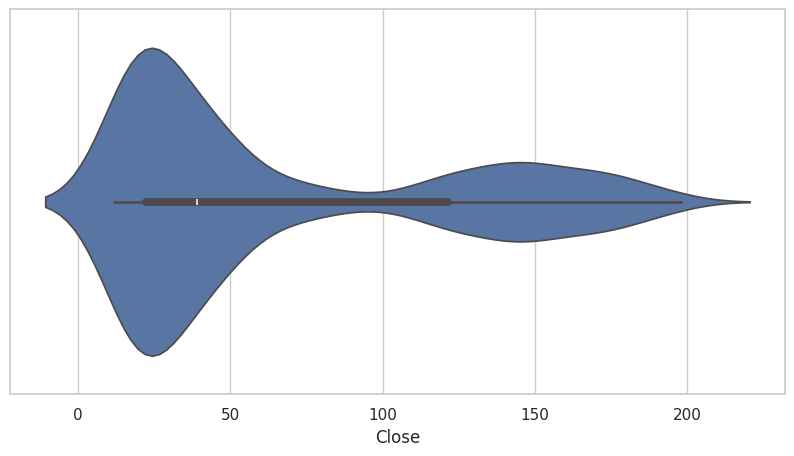

In [24]:
%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.violinplot(x='Close', data=df, orient="h")

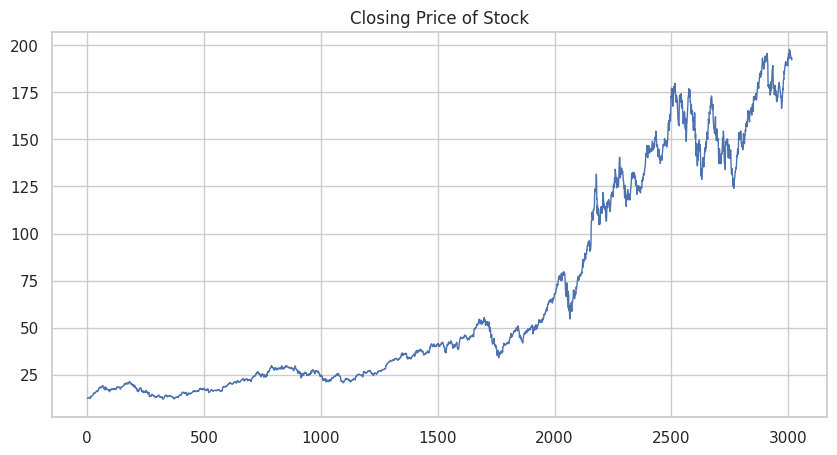

In [25]:
df.plot(y="Close", title="Closing Price of Stock", grid=True, legend=False, linewidth=1, figsize=(10,5))
plt.show()


### Percentage Change
We can determine the daily changes in percentages. This means how much the price deviated from the previous day's price.

In [26]:
df["Day_Perc_Change"] = df["Close"].pct_change().fillna(value=0)*100
df.head()

,Date,Headlines,Open,High,Low,Close,Volume,Yesterday,Subjectivity,Polarity,...,Momentum_60,RollingMean_250,RollingStd_250,Momentum_250,RollingMean_500,RollingStd_500,Momentum_500,Positive,Label(Up/Down),Day_Perc_Change
0,2012-01-03,democrat becom target occupi protest european ...,12.378494,12.472224,12.366399,12.433825,302220800,12.245458,0.443480,0.112125,...,1.023780,11.023385,0.784609,2.335102,9.467322,1.840696,6.024462,0.095,1,0.000000
1,2012-01-04,decod iowa caucu coverag explain tonight poll ...,12.396637,12.538141,12.374867,12.500648,260022000,12.433825,0.409932,0.119099,...,1.319489,11.033026,0.787901,2.410088,9.479618,1.840383,6.147826,0.080,1,0.537429
2,2012-01-05,bachmann next decis whether run reelect questi...,12.546302,12.655149,12.477363,12.639427,271269600,12.500648,0.440050,0.147485,...,0.883487,11.042932,0.792472,2.476606,9.492336,1.840203,6.358870,0.100,1,1.110180
3,2012-01-06,ron paul move chart kelli clarkson may prove m...,12.692040,12.782142,12.675410,12.771560,318292800,12.639427,0.366081,0.113129,...,0.668514,11.052602,0.798757,2.417348,9.505140,1.840702,6.402411,0.100,0,1.045400
4,2012-01-09,william p carey leader commerci real estat die...,12.865288,12.933318,12.739809,12.751299,394024400,12.771560,0.344342,0.061082,...,0.590804,11.062288,0.804617,2.421575,9.517979,1.840914,6.419035,0.081,1,-0.158640


In [27]:
from sklearn.metrics import mean_absolute_error
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")

        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)

    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

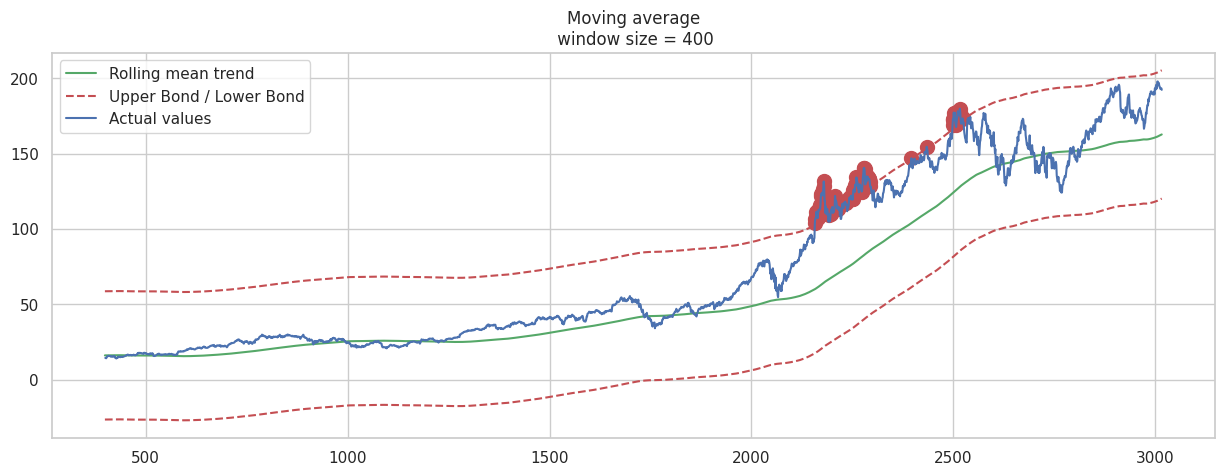

In [28]:
plotMovingAverage(df[['Close']], 400, plot_intervals=True, scale=1.96, plot_anomalies=True)

The moving average window clashes with the actual data at some points in the plot because of the drastic peak and trough pattern.

### Stationarity

In [29]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(series):

  result = adfuller(series, autolag='AIC')
  print(f'ADF Statistic: {result[0]}')
  print(f'n_lags: {result[1]}')
  print(f'p-value: {result[1]}')
  for key, value in result[4].items():

    print('Critial Values:')
    print(f'   {key}, {value}')

  print("======================================")

  if result[0] > 0.05:
    print("The data is non stationary")
  else :
    print("The data is stationary")

check_stationarity(df['Close'])


ADF Statistic: 0.684749448971438
n_lags: 0.9895285527787182
p-value: 0.9895285527787182
Critial Values:
   1%, -3.4325330913621452
Critial Values:
   5%, -2.862504548608965
Critial Values:
   10%, -2.5672834546224057
The data is non stationary


**The ADF statistic is more than 0.05.** Since the data is non stationary, we have to make it stationary before running a model.

In [30]:
df['Close_stationary'] = df['Close'].diff().dropna()
df = df[df['Close_stationary'].notna()]
df.head()

,Date,Headlines,Open,High,Low,Close,Volume,Yesterday,Subjectivity,Polarity,...,RollingMean_250,RollingStd_250,Momentum_250,RollingMean_500,RollingStd_500,Momentum_500,Positive,Label(Up/Down),Day_Perc_Change,Close_stationary
1,2012-01-04,decod iowa caucu coverag explain tonight poll ...,12.396637,12.538141,12.374867,12.500648,260022000,12.433825,0.409932,0.119099,...,11.033026,0.787901,2.410088,9.479618,1.840383,6.147826,0.080,1,0.537429,0.066823
2,2012-01-05,bachmann next decis whether run reelect questi...,12.546302,12.655149,12.477363,12.639427,271269600,12.500648,0.440050,0.147485,...,11.042932,0.792472,2.476606,9.492336,1.840203,6.358870,0.100,1,1.110180,0.138780
3,2012-01-06,ron paul move chart kelli clarkson may prove m...,12.692040,12.782142,12.675410,12.771560,318292800,12.639427,0.366081,0.113129,...,11.052602,0.798757,2.417348,9.505140,1.840702,6.402411,0.100,0,1.045400,0.132133
4,2012-01-09,william p carey leader commerci real estat die...,12.865288,12.933318,12.739809,12.751299,394024400,12.771560,0.344342,0.061082,...,11.062288,0.804617,2.421575,9.517979,1.840914,6.419035,0.081,1,-0.158640,-0.020261
5,2012-01-10,name dead today scuttlebot rescuer hot tech jo...,12.877682,12.880404,12.744343,12.796953,258196400,12.751299,0.418123,0.161151,...,11.071821,0.810995,2.383175,9.531120,1.840822,6.570516,0.100,0,0.358036,0.045654


In [31]:
# Checking Stationarity again
check_stationarity(df['Close_stationary'])

ADF Statistic: -12.594009309510227
n_lags: 1.7953102145124775e-23
p-value: 1.7953102145124775e-23
Critial Values:
   1%, -3.4325330913621452
Critial Values:
   5%, -2.862504548608965
Critial Values:
   10%, -2.5672834546224057
The data is stationary


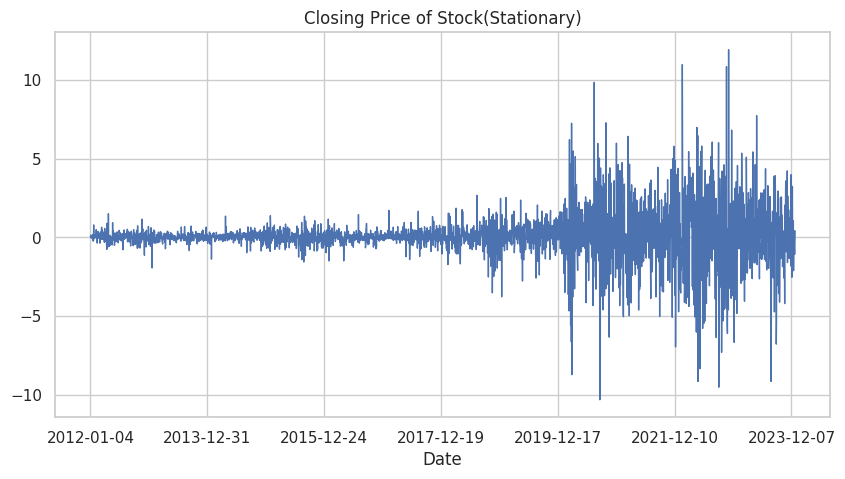

In [32]:
df.plot(y="Close_stationary",x="Date", title="Closing Price of Stock(Stationary)", grid=True, legend=False, linewidth=1, figsize=(10,5))
plt.show()


# **Cleaning and Preprocessing**

In [33]:
def headline_cleaning_func(headline):
    headline = re.sub(r'NaN', '', headline)
    headline = re.sub(r'nan', '', headline)
    headline = re.sub(r'\s+', ' ', headline)
    headline = re.sub(r'http\S+', '', headline)
    headline = re.sub(r'[^\w\s]', '', headline)
    headline = emoji.demojize(headline)

    return headline.lower().strip()

df['Headlines'] = df['Headlines'].apply(headline_cleaning_func)

In [34]:
df

,Date,Headlines,Open,High,Low,Close,Volume,Yesterday,Subjectivity,Polarity,...,RollingMean_250,RollingStd_250,Momentum_250,RollingMean_500,RollingStd_500,Momentum_500,Positive,Label(Up/Down),Day_Perc_Change,Close_stationary
1,2012-01-04,decod iowa caucu coverag explain tonight poll ...,12.396637,12.538141,12.374867,12.500648,260022000,12.433825,0.409932,0.119099,...,11.033026,0.787901,2.410088,9.479618,1.840383,6.147826,0.080,1,0.537429,0.066823
2,2012-01-05,bachmann next decis whether run reelect questi...,12.546302,12.655149,12.477363,12.639427,271269600,12.500648,0.440050,0.147485,...,11.042932,0.792472,2.476606,9.492336,1.840203,6.358870,0.100,1,1.110180,0.138780
3,2012-01-06,ron paul move chart kelli clarkson may prove m...,12.692040,12.782142,12.675410,12.771560,318292800,12.639427,0.366081,0.113129,...,11.052602,0.798757,2.417348,9.505140,1.840702,6.402411,0.100,0,1.045400,0.132133
4,2012-01-09,william p carey leader commerci real estat die...,12.865288,12.933318,12.739809,12.751299,394024400,12.771560,0.344342,0.061082,...,11.062288,0.804617,2.421575,9.517979,1.840914,6.419035,0.081,1,-0.158640,-0.020261
5,2012-01-10,name dead today scuttlebot rescuer hot tech jo...,12.877682,12.880404,12.744343,12.796953,258196400,12.751299,0.418123,0.161151,...,11.071821,0.810995,2.383175,9.531120,1.840822,6.570516,0.100,0,0.358036,0.045654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,2023-12-22,u prepar lift ban sale offens weapon saudi ara...,194.931260,195.160978,192.724085,193.353287,37122800,194.431885,0.346313,0.069688,...,170.864818,18.123701,62.393326,162.435817,17.730974,16.314606,0.118,0,-0.554743,-1.078598
3013,2023-12-26,u strike iranback group iraq attack base injur...,193.363270,193.642911,192.584265,192.803986,28919300,193.353287,0.294114,0.046984,...,171.119464,17.981810,63.661545,162.467170,17.770820,15.676392,0.063,1,-0.284092,-0.549301
3014,2023-12-27,michael flynn rhode island hall fame inclus pr...,192.244692,193.253399,190.846467,192.903839,48087700,192.803986,0.405104,-0.012241,...,171.390361,17.796121,67.724167,162.501053,17.812704,16.941437,0.072,1,0.051790,0.099854
3015,2023-12-28,herbert kohl former wisconsin senat milwauke b...,193.892582,194.411923,192.923817,193.333298,34049900,192.903839,0.315618,0.021329,...,171.648792,17.642508,64.607986,162.537038,17.856815,17.992966,0.054,0,0.222628,0.429459


In [35]:
df['Headlines'][1]

'decod iowa caucu coverag explain tonight poll wall street over progress come crawl year battl train may roll oahu best android game app liguria coastal hill storm furi bring struggl restor westchest counti platinum mile reinvent new hampshir option time toll new math new jersey commut cuomo microscop capitol renov massachusett polic say lieuten governor sleep speed car crash earli number exit poll gordon hirabayashi world war ii intern oppon die overtur egypt islamist revers longtim u polici teacher resist hightech push idaho school louisiana bp cleanup payment hold turn tax time parti time romney win iowa caucu vote entranc poll show high evangel turnout firebomb pick target settl person score polic say small light starbuck bottl canist bomb fred j schmidt entranc poll examin romney strength histori state capitol accus bulli death teenag month ahead onlin sale buoy up fedex obama speak caucus democrat iowa lotteri number sacrif nurtur son academ aspir school lose bid halt man protest

# **Splitting the Dataset and Applying Classification Algorithms**

In [83]:
predictors = ['Open','High','Low','Close','Volume','Subjectivity','Polarity','Compound','Negative','Neutral','Positive','Yesterday','Close_stationary','Day_Perc_Change']
feature = df[predictors]
target = df["Label(Up/Down)"]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=42)
qt = QuantileTransformer(output_distribution='normal')
X_train = qt.fit_transform(X_train)
X_test = qt.transform(X_test)

In [96]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
y_pred_lda = LDA.predict(X_test)
lda_pred_proba = LDA.predict_proba(X_test)

precision_lda = precision_score(y_test, y_pred_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda,normalize=True)

print('Linear Regression')
print(classification_report(y_test, y_pred_lda))
print(f"Precision Score (weighted): {precision_lda}")
print(f"Accuracy Score (weighted): {accuracy_lda}")

Linear Regression
              precision    recall  f1-score   support

           0       0.48      0.29      0.36       428
           1       0.53      0.72      0.61       477

    accuracy                           0.52       905
   macro avg       0.51      0.51      0.49       905
weighted avg       0.51      0.52      0.49       905

Precision Score (weighted): 0.5309597523219814
Accuracy Score (weighted): 0.5171270718232044


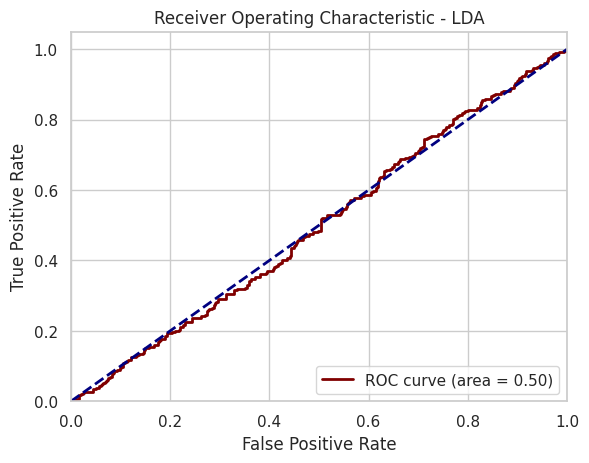

In [110]:
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='maroon', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, lda_pred_proba, 'LDA')

In [98]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_pred_proba = lr.predict_proba(X_test)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted', zero_division=1)
accuracy_lr = accuracy_score(y_test, y_pred_lr,normalize=True)

print('Logistic Regression')
print(classification_report(y_test, y_pred_lr))
print(f"Precision Score (weighted): {precision_lr}")
print(f"Accuracy Score (weighted): {accuracy_lr}")

Logistic Regression
              precision    recall  f1-score   support

           0       0.49      0.26      0.34       428
           1       0.53      0.75      0.62       477

    accuracy                           0.52       905
   macro avg       0.51      0.51      0.48       905
weighted avg       0.51      0.52      0.49       905

Precision Score (weighted): 0.5119902536531313
Accuracy Score (weighted): 0.5215469613259669


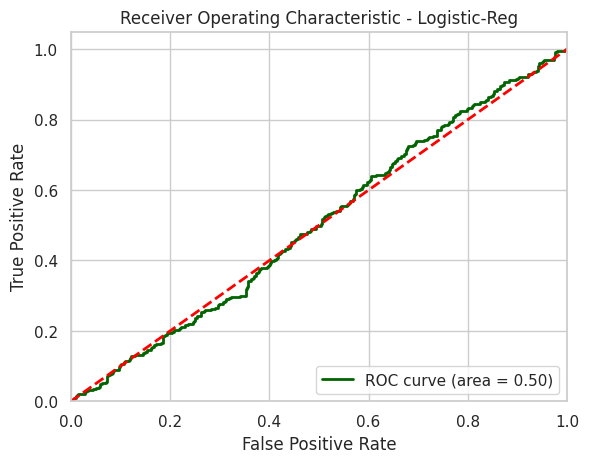

In [109]:
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, lr_pred_proba, 'Logistic-Reg')

In [101]:
# SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_pred_proba = svm.predict_proba(X_test)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted', zero_division=1)
accuracy_svm = accuracy_score(y_test, y_pred_svm,normalize=True)

print('SVM')
print(classification_report(y_test, y_pred_svm))
print(f"Precision Score (weighted): {precision_svm}")
print(f"Accuracy Score (weighted): {accuracy_svm}")



SVM
              precision    recall  f1-score   support

           0       0.48      0.28      0.36       428
           1       0.53      0.73      0.61       477

    accuracy                           0.52       905
   macro avg       0.51      0.50      0.48       905
weighted avg       0.51      0.52      0.49       905

Precision Score (weighted): 0.5063560152287911
Accuracy Score (weighted): 0.5160220994475138


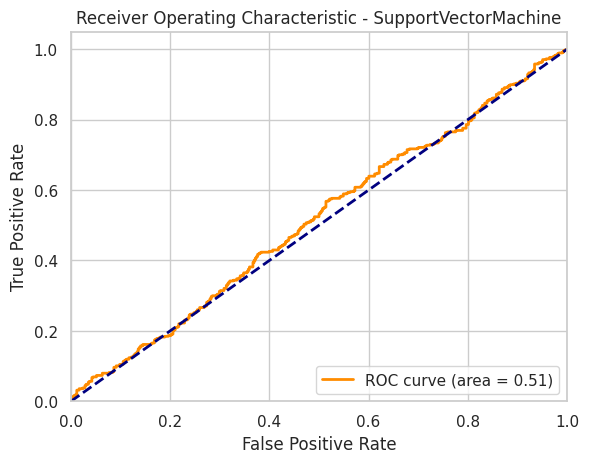

In [104]:
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, svm_pred_proba, 'SupportVectorMachine')

In [105]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_pred_proba = rf.predict_proba(X_test)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=1)
accuracy_rf = accuracy_score(y_test, y_pred_rf,normalize=True)

print('Random Forest')
print(classification_report(y_test, y_pred_rf))
print(f"Precision Score (weighted): {precision_rf}")
print(f"Accuracy Score (weighted): {accuracy_rf}")

Random Forest
              precision    recall  f1-score   support

           0       0.47      0.33      0.39       428
           1       0.53      0.67      0.59       477

    accuracy                           0.51       905
   macro avg       0.50      0.50      0.49       905
weighted avg       0.50      0.51      0.50       905

Precision Score (weighted): 0.5029230963156184
Accuracy Score (weighted): 0.5104972375690607


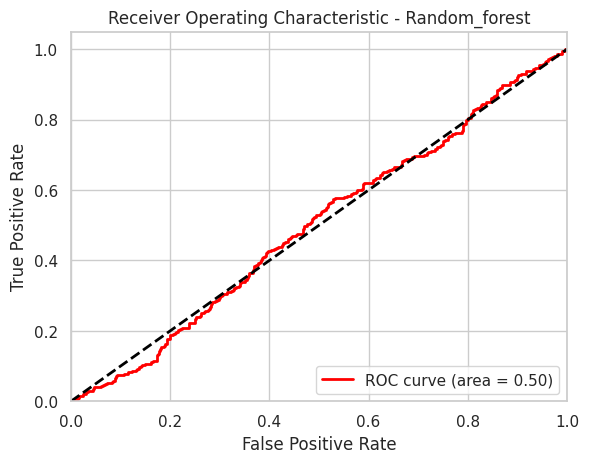

In [107]:
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, rf_pred_proba, 'Random_forest')

# **ARIMA**

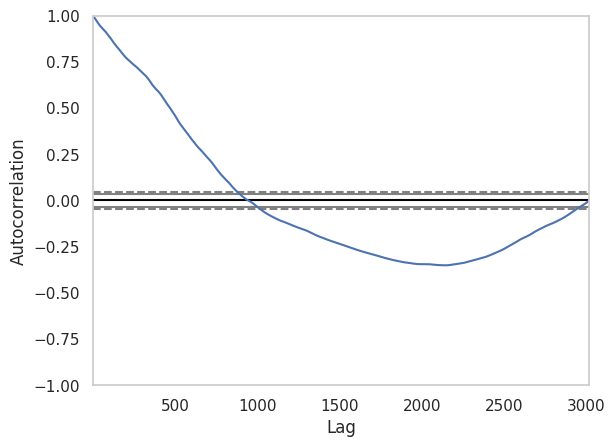

In [44]:
autocorrelation_plot(df['Close'])
plt.show()

predicted=64.256623, expected=63.110607
predicted=63.150789, expected=63.667610
predicted=63.753819, expected=64.601685
predicted=64.578337, expected=65.849548
predicted=65.762526, expected=64.927673
predicted=64.825627, expected=65.307114
predicted=65.370111, expected=65.864159
predicted=65.924403, expected=66.031990
predicted=65.996785, expected=66.929581
predicted=66.909721, expected=68.075279
predicted=68.067155, expected=68.209061
predicted=68.156238, expected=68.046082
predicted=68.047807, expected=68.114197
predicted=68.173793, expected=67.973114
predicted=67.998498, expected=69.082344
predicted=69.100619, expected=69.148010
predicted=69.094834, expected=70.519928
predicted=70.512612, expected=70.493141
predicted=70.458149, expected=70.911552
predicted=70.921403, expected=71.429665
predicted=71.462109, expected=73.059433
predicted=73.087126, expected=72.349144
predicted=72.273781, expected=72.925652
predicted=72.963323, expected=72.582657
predicted=72.636839, expected=73.750244


Text(0.5, 1.0, 'Original vs Predicted Stock Price')

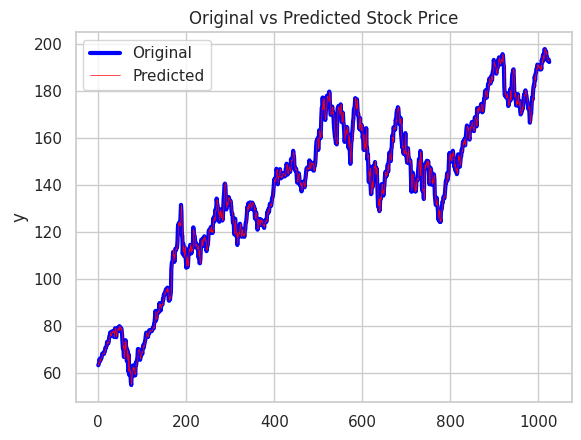

In [45]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = df['Close'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
	model = sm.tsa.arima.ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.plot(test, color = 'blue', linewidth = 3, label = 'Original' )
plt.plot(predictions, color='red',linewidth = 0.5, label = 'Predicted')
plt.legend()
plt.ylabel('y')
plt.xticks(x = df.index)
plt.title('Original vs Predicted Stock Price')



Arima RMSE was quite satisfactory

# **Model Prediction**

In [180]:
p=pd.read_csv('nyt_articles_2024.csv')
df2=pd.read_csv('sp500_stock.csv')

In [181]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

In [182]:
p['Subjectivity'] = p['Headlines'].apply(getSubjectivity)
p['Polarity'] = p['Headlines'].apply(getPolarity)
compound = []
negative = []
positive = []
neutral = []
SIA = 0
for i in range(0, len(p['Headlines'])):
    SIA = getSIA(p['Headlines'][i])
    compound.append(SIA['compound'])
    negative.append(SIA['neg'])
    neutral.append(SIA['neu'])
    positive.append(SIA['pos'])

p['Compound'] = compound
p['Negative'] = negative
p['Neutral'] = neutral
p['Positive'] = positive

p

,Date,Headlines,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2024-01-01,pga tour saudiback liv extend deadlin final de...,0.404672,0.120707,-0.9490,0.181,0.711,0.108
1,2024-01-02,south korean opposit leader stab yearold die s...,0.422998,0.175054,-0.9953,0.198,0.740,0.061
2,2024-01-03,epstein document name promin figur expect rele...,0.447047,0.136802,-0.9979,0.222,0.707,0.071
3,2024-01-04,unseal document shed light epstein misde littl...,0.405678,0.083816,-0.9946,0.174,0.746,0.079
4,2024-01-05,town empti farm languish war stalk israelileba...,0.349820,0.137964,-0.9981,0.196,0.748,0.056
...,...,...,...,...,...,...,...,...
147,2024-05-27,nicki minaj apolog postpon show video appear s...,0.511334,0.045218,-0.0895,0.137,0.737,0.126
148,2024-05-28,trump lawyer assail limit gag order request do...,0.485839,0.238636,-0.9978,0.163,0.795,0.041
149,2024-05-29,juri texa state hous st district primari runof...,0.342176,0.001639,-0.9895,0.127,0.807,0.066
150,2024-05-30,activist investor nelson peltz say sell disney...,0.454133,0.075080,-0.9949,0.144,0.789,0.067


In [183]:
merge2=pd.merge(p, df2, on='Date')
merge2

,Date,Headlines,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Open,High,Low,Close,Volume,Dividends,Stock Splits,Yesterday,Tomorrow,Label(Up/Down),Cumu_Label(Up/Down)
0,2024-01-02,south korean opposit leader stab yearold die s...,0.422998,0.175054,-0.9953,0.198,0.740,0.061,186.911482,188.199846,183.655642,185.403412,82488700,0.0,0.0,192.284637,184.015198,0,-2
1,2024-01-03,epstein document name promin figur expect rele...,0.447047,0.136802,-0.9979,0.222,0.707,0.071,183.985237,185.643125,183.196235,184.015198,58414500,0.0,0.0,185.403412,181.678177,0,-3
2,2024-01-04,unseal document shed light epstein misde littl...,0.405678,0.083816,-0.9946,0.174,0.746,0.079,181.917861,182.856666,180.649491,181.678177,71983600,0.0,0.0,184.015198,180.949097,0,-4
3,2024-01-05,town empti farm languish war stalk israelileba...,0.349820,0.137964,-0.9981,0.196,0.748,0.056,181.758077,182.527085,179.940389,180.949097,62303300,0.0,0.0,181.678177,185.323517,1,0
4,2024-01-08,boe max jet remain ground airlin await inspect...,0.385290,0.100302,-0.9972,0.176,0.782,0.042,181.857938,185.363474,181.268693,185.323517,59144500,0.0,0.0,180.949097,184.904053,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2024-05-24,face possibl cash crunch giant real estat fund...,0.429722,0.142688,-0.9774,0.127,0.790,0.083,188.820007,190.580002,188.039993,189.979996,36294600,0.0,0.0,186.880005,189.990005,1,1
101,2024-05-28,trump lawyer assail limit gag order request do...,0.485839,0.238636,-0.9978,0.163,0.795,0.041,191.509995,193.000000,189.100006,189.990005,52280100,0.0,0.0,189.979996,190.289993,1,2
102,2024-05-29,juri texa state hous st district primari runof...,0.342176,0.001639,-0.9895,0.127,0.807,0.066,189.610001,192.250000,189.509995,190.289993,53068000,0.0,0.0,189.990005,191.289993,1,3
103,2024-05-30,activist investor nelson peltz say sell disney...,0.454133,0.075080,-0.9949,0.144,0.789,0.067,190.759995,192.179993,190.630005,191.289993,49947900,0.0,0.0,190.289993,192.250000,1,4


In [184]:
merge2.columns

Index(['Date', 'Headlines', 'Subjectivity', 'Polarity', 'Compound', 'Negative',
       'Neutral', 'Positive', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Dividends', 'Stock Splits', 'Yesterday', 'Tomorrow', 'Label(Up/Down)',
       'Cumu_Label(Up/Down)'],
      dtype='object')

In [200]:
predictors2 = ['Subjectivity', 'Polarity', 'Compound', 'Negative',
       'Neutral', 'Positive', 'Open', 'High', 'Low', 'Close', 'Volume',
        'Yesterday', 'Tomorrow','Cumu_Label(Up/Down)']

In [201]:
feauture2 = merge2[predictors2]
target2 = merge2["Label(Up/Down)"]

In [202]:
(X_test2, y_test2)=(feauture2, target2)
scaler = QuantileTransformer(output_distribution='normal')
X_test2 = scaler.fit_transform(X_test2)

In [203]:
y_pred_lda = LDA.predict(X_test2)
precision_lda = precision_score(y_test2, y_pred_lda, average='weighted', zero_division=1)

print('Linear Regression')
print(classification_report(y_test2, y_pred_lda))
print(f"Precision Score (weighted): {precision_lda}")


y_pred_lr = lr.predict(X_test2)
precision = precision_score(y_test2, y_pred_lr, average='weighted', zero_division=1)

print('Logistic Regression')
print(classification_report(y_test2, y_pred_lr))
print(f"Precision Score (weighted): {precision}")


y_pred_svm = svm.predict(X_test2)
precision_svm = precision_score(y_test2, y_pred_svm, average='weighted', zero_division=1)

print('SVM')
print(classification_report(y_test2, y_pred_svm))
print(f"Precision Score (weighted): {precision_svm}")


y_pred_rf = rf.predict(X_test2)
precision_rf = precision_score(y_test2, y_pred_rf, average='weighted', zero_division=1)

print('Random Forest')
print(classification_report(y_test2, y_pred_rf))
print(f"Precision Score (weighted): {precision_rf}")

y_pred_avg = np.round((y_pred_lda + y_pred_lr + y_pred_svm + y_pred_rf) / 5)
from sklearn.metrics import classification_report, precision_score


precision_avg = precision_score(y_test2, y_pred_avg, average='weighted', zero_division=1)

print('Average of All Classifiers')
print(classification_report(y_test2, y_pred_avg))
print(f"Precision Score (weighted): {precision_avg}")

Linear Regression
              precision    recall  f1-score   support

           0       0.49      0.52      0.50        52
           1       0.49      0.46      0.48        52

    accuracy                           0.49       104
   macro avg       0.49      0.49      0.49       104
weighted avg       0.49      0.49      0.49       104

Precision Score (weighted): 0.4903525046382189
Logistic Regression
              precision    recall  f1-score   support

           0       0.52      0.48      0.50        52
           1       0.52      0.56      0.54        52

    accuracy                           0.52       104
   macro avg       0.52      0.52      0.52       104
weighted avg       0.52      0.52      0.52       104

Precision Score (weighted): 0.5193452380952381
SVM
              precision    recall  f1-score   support

           0       0.47      0.27      0.34        52
           1       0.49      0.69      0.57        52

    accuracy                           0.48   

In [204]:
y_pred_avg = ((y_pred_lda) + (1*y_pred_lr) + (y_pred_svm)+2*y_pred_rf) / 6

threshold = 0.5
y_pred_avg_binary = (y_pred_avg >= threshold).astype(int)

precision_avg = precision_score(y_test2, y_pred_avg_binary, average='weighted', zero_division=1)

print('Weighted Average of All Classifiers')
print(classification_report(y_test2, y_pred_avg_binary))
print(f"Weighted Precision Score: {precision_avg}")


Weighted Average of All Classifiers
              precision    recall  f1-score   support

           0       0.46      0.33      0.38        52
           1       0.48      0.62      0.54        52

    accuracy                           0.47       104
   macro avg       0.47      0.47      0.46       104
weighted avg       0.47      0.47      0.46       104

Weighted Precision Score: 0.46853569987898347


# **Generating and Plotting Buy/Sell Signal Chart**

In [205]:
merge2['y_pred_avg_binary'] = y_pred_avg_binary

In [206]:
label_changes = merge2["y_pred_avg_binary"] != merge2["y_pred_avg_binary"].shift(1)
group_id = label_changes.cumsum()
merge2["Cumu_Label(Up/Down)"] = merge2.groupby(group_id).cumcount()
merge2["Cumu_Label(Up/Down)"] = merge2.apply(
    lambda row: row["Cumu_Label(Up/Down)"] if row["y_pred_avg_binary"] == 1 else -row["Cumu_Label(Up/Down)"],
    axis=1)
merge2['Diff'] = merge2['Cumu_Label(Up/Down)'].diff()

In [208]:
def generate_signal(row):
    if row['Diff'] > 0 and row['Cumu_Label(Up/Down)'] ==1:
        return "Buy"
    elif row['Diff'] <= -1 and row['Cumu_Label(Up/Down)'] ==-1:
        return "Sell"
    else:
        return "Hold"

merge2['Signal'] = merge2.apply(generate_signal, axis=1)
merge2.dropna(subset=['Diff'], inplace=True)

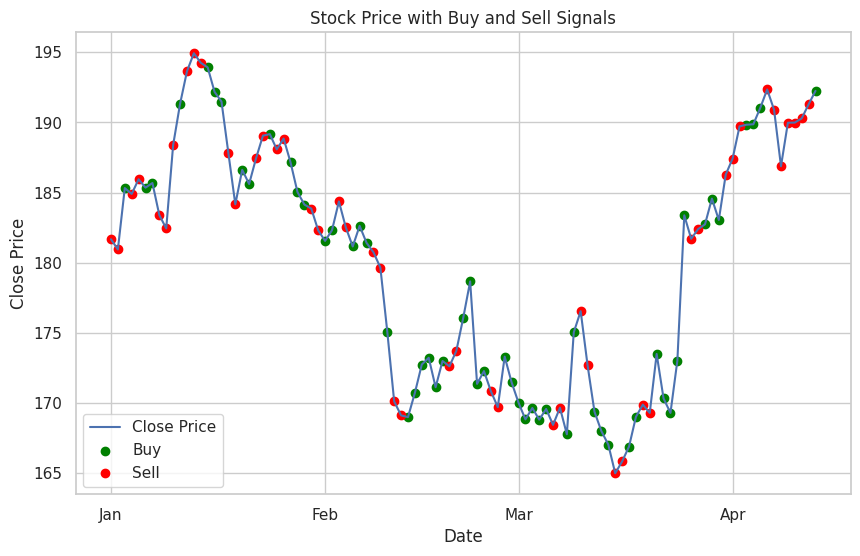

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

merge2['Signal'] = np.where(merge2['Diff'] > 0, 'Buy', 'Sell')

plt.figure(figsize=(10, 6))
plt.plot(merge2['Date'], merge2['Close'], label='Close Price')
plt.scatter(merge2[merge2['Signal'] == 'Buy']['Date'], merge2[merge2['Signal'] == 'Buy']['Close'], color='green', label='Buy')
plt.scatter(merge2[merge2['Signal'] == 'Sell']['Date'], merge2[merge2['Signal'] == 'Sell']['Close'], color='red', label='Sell')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price with Buy and Sell Signals')
plt.legend()
plt.show()


In [210]:
plt.savefig('SP500_Signal_Chart.jpg')

<Figure size 640x480 with 0 Axes>

# **Evaluation Metrics**

In [229]:
holding_flag = 0

merge2['Holding'] = False

for index, row in merge2.iterrows():
    if row['Signal'] == "Buy":
        holding_flag += 1
    elif row['Signal'] == "Sell":
        holding_flag -= 1

    merge2.at[index, 'Holding'] = holding_flag

rows_to_append = []

mm = int(merge2.iloc[-1]['Holding'])
while(mm>0):
    new_row = merge2.iloc[-1].copy()
    new_row['Signal'] = 'Sell'
    rows_to_append.append(new_row.to_dict())
    mm= mm-1

merge2 = pd.concat([merge2, pd.DataFrame(rows_to_append)])


merge2['Daily_Return'] = merge2['Close'].pct_change()
merge2['Holding_Return'] = merge2['Daily_Return'] * merge2['Holding']
merge2['Holding_Return'].fillna(0, inplace=True)
merge2['Cumulative_Return'] = (1 + merge2['Holding_Return']).cumprod()
merge2['Excess_Holding_Return'] = merge2['Holding_Return']

In [230]:
merge2['Cumulative_Return'] = (1 + merge2['Holding_Return']).cumprod()
merge2['Running_Max'] = merge2['Cumulative_Return'].cummax()
merge2['Drawdown'] = merge2['Cumulative_Return'] / merge2['Running_Max'] - 1
max_drawdown = merge2['Drawdown'].min()

In [231]:
num_trades = buy_signals.shape[0]

min_trades = min(len(buy_signals), len(sell_signals))
buy_signals = buy_signals.iloc[:min_trades]
sell_signals = sell_signals.iloc[:min_trades]

trades = pd.DataFrame({
    'Buy_Date': buy_signals['Date'].values,
    'Sell_Date': sell_signals['Date'].values,
    'Buy_Price': buy_signals['Close'].values,
    'Sell_Price': sell_signals['Close'].values,
    'Profit/Loss': sell_signals['Close'].values - buy_signals['Close'].values
})
win_ratio = (trades['Profit/Loss'] > 0).mean()


trades['Return'] = trades['Profit/Loss'] / trades['Buy_Price']

mean_return = trades['Return'].mean()
std_return = trades['Return'].std()

risk_free_rate = 0.0

sharpe_ratio = (mean_return - risk_free_rate) / std_return
cumulative_return = (trades['Return'] + 1).prod() - 1
trades['Investment'] = trades['Buy_Price']
total_investment = trades['Investment'].sum()
trades['Weighted_Return'] = trades['Profit/Loss'] / trades['Investment']
portfolio_total_return = trades['Profit/Loss'].sum() / trades['Investment'].sum()




Nvidia is now the world's most valuable company as of 20th Jun 2024. Predicitions for Nvidia Stocks.

In [244]:
ticker = "NVDA"
start_date = "2024-01-02"
end_date = "2024-05-31"

_sp500 = yf.Ticker(ticker)
_sp500_data = _sp500.history(period="max")
_sp500_data.reset_index(inplace=True)
_sp500_data['Date'] = _sp500_data['Date'].dt.date
start_value = _sp500_data.loc[_sp500_data['Date'] == pd.to_datetime(start_date).date(), 'Close'].values[0]
end_value = _sp500_data.loc[_sp500_data['Date'] == pd.to_datetime(end_date).date(), 'Close'].values[0]

def annualized_return(initial_value, final_value, num_years):
    return (final_value / initial_value) ** (1 / num_years) - 1
num_years = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days / 365

total_return = annualized_return(start_value, end_value, 1)

p_total_return = annualized_return(first_close, last_close, 1)

In [233]:

print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")
print(f"Number of Trades: {num_trades}")
print(f"Win Ratio: {win_ratio:.2%}")
print("")
print("Portfolio Total Return: {:.2%}".format(portfolio_total_return))
print(f"NVDA total return is: {p_total_return:.2%}")
print(f"SP500 total return is: {total_return:.2%}")
print("")
print(trades)

Sharpe Ratio: 1.02
Maximum Drawdown: -39.81%
Number of Trades: 13
Win Ratio: 92.31%

Portfolio Total Return: 6.01%
NVDA total return is: 4.48%
SP500 total return is: 127.62%

      Buy_Date   Sell_Date   Buy_Price  Sell_Price  Profit/Loss    Return  \
0   2024-01-08  2024-01-19  185.323517  191.315872     5.992355  0.032335   
1   2024-02-01  2024-02-05  186.621872  187.440811     0.818939  0.004388   
2   2024-02-08  2024-03-01  188.080017  179.660004    -8.420013 -0.044768   
3   2024-02-21  2024-05-08  182.320007  182.740005     0.419998  0.002304   
4   2024-02-26  2024-05-14  181.160004  187.429993     6.269989  0.034610   
5   2024-03-07  2024-05-29  169.000000  190.289993    21.289993  0.125976   
6   2024-03-12  2024-05-31  173.229996  192.250000    19.020004  0.109796   
7   2024-03-21  2024-05-31  171.369995  192.250000    20.880005  0.121842   
8   2024-03-27  2024-05-31  173.309998  192.250000    18.940002  0.109284   
9   2024-04-18  2024-05-31  167.039993  192.250000    2

In [247]:
fin_df = pd.DataFrame({
    'Date' : merge2['Date'],
    'Open': merge2['Open'],
    'High': merge2['High'],
    'Low': merge2['Low'],
    'Close': merge2['Close'],
    'Volume': merge2['Volume'],
    'Subjectivity': merge2['Subjectivity'],
    'Polarity': merge2['Polarity'],
    'Compound': merge2['Compound'],
    'Negative': merge2['Negative'],
    'Neutral': merge2['Neutral'],
    'Positive': merge2['Positive'],
    'Yesterday': merge2['Yesterday'],
    'Tomorrow': merge2['Tomorrow'],
    'Cumu_Label(Up/Down)': merge2['Cumu_Label(Up/Down)'],
    'Diff': merge2['Diff'],
    'Signal': merge2['Signal'],
    'Cumulative_Return': merge2['Cumulative_Return'],
    'Running_Max': merge2['Running_Max'],
    'Drawdown': merge2['Drawdown']
})

trades_df = pd.DataFrame({
    'Buy_Date': trades['Buy_Date'],
    'Sell_Date': trades['Sell_Date'],
    'Buy_Price': trades['Buy_Price'],
    'Sell_Price': trades['Sell_Price'],
    'Profit/Loss': trades['Profit/Loss'],
    'Return': trades['Return'],
    'Investment': trades['Investment'],
    'Weighted_Return': trades['Weighted_Return']
})


# **Final Dataframes**

In [248]:
print("Financial Dataframe:")
display(fin_df)

Financial Dataframe:


,Date,Open,High,Low,Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Yesterday,Tomorrow,Cumu_Label(Up/Down),Diff,Signal,Cumulative_Return,Running_Max,Drawdown
2,2024-01-04,181.917861,182.856666,180.649491,181.678177,71983600,0.405678,0.083816,-0.9946,0.174,0.746,0.079,184.015198,180.949097,0,0.0,Sell,1.000000,1.000000,0.000000
3,2024-01-05,181.758077,182.527085,179.940389,180.949097,62303300,0.349820,0.137964,-0.9981,0.196,0.748,0.056,181.678177,185.323517,0,0.0,Sell,1.008026,1.008026,0.000000
4,2024-01-08,181.857938,185.363474,181.268693,185.323517,59144500,0.385290,0.100302,-0.9972,0.176,0.782,0.042,180.949097,184.904053,1,1.0,Buy,0.983657,1.008026,-0.024175
5,2024-01-09,183.685606,184.914035,182.497120,184.904053,42841800,0.447812,0.053901,-0.9971,0.181,0.761,0.058,185.323517,185.952713,0,-1.0,Sell,0.988110,1.008026,-0.019757
6,2024-01-10,184.115062,186.162437,183.685602,185.952713,46792900,0.401869,0.108188,-0.9968,0.148,0.799,0.053,184.904053,185.353485,0,0.0,Sell,0.971298,1.008026,-0.036435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2024-05-31,191.440002,192.570007,189.910004,192.250000,75158300,0.425880,0.152737,-0.2874,0.115,0.768,0.117,191.289993,194.029999,0,2.0,Sell,3.235204,3.600171,-0.101375
3,2024-05-31,191.440002,192.570007,189.910004,192.250000,75158300,0.425880,0.152737,-0.2874,0.115,0.768,0.117,191.289993,194.029999,0,2.0,Sell,3.235204,3.600171,-0.101375
4,2024-05-31,191.440002,192.570007,189.910004,192.250000,75158300,0.425880,0.152737,-0.2874,0.115,0.768,0.117,191.289993,194.029999,0,2.0,Sell,3.235204,3.600171,-0.101375
5,2024-05-31,191.440002,192.570007,189.910004,192.250000,75158300,0.425880,0.152737,-0.2874,0.115,0.768,0.117,191.289993,194.029999,0,2.0,Sell,3.235204,3.600171,-0.101375


In [249]:
print("Trades Dataframe:")
display(trades_df)


Trades Dataframe:


,Buy_Date,Sell_Date,Buy_Price,Sell_Price,Profit/Loss,Return,Investment,Weighted_Return
0,2024-01-08,2024-01-19,185.323517,191.315872,5.992355,0.032335,185.323517,0.032335
1,2024-02-01,2024-02-05,186.621872,187.440811,0.818939,0.004388,186.621872,0.004388
2,2024-02-08,2024-03-01,188.080017,179.660004,-8.420013,-0.044768,188.080017,-0.044768
3,2024-02-21,2024-05-08,182.320007,182.740005,0.419998,0.002304,182.320007,0.002304
4,2024-02-26,2024-05-14,181.160004,187.429993,6.269989,0.034610,181.160004,0.034610
5,2024-03-07,2024-05-29,169.000000,190.289993,21.289993,0.125976,169.000000,0.125976
6,2024-03-12,2024-05-31,173.229996,192.250000,19.020004,0.109796,173.229996,0.109796
7,2024-03-21,2024-05-31,171.369995,192.250000,20.880005,0.121842,171.369995,0.121842
8,2024-03-27,2024-05-31,173.309998,192.250000,18.940002,0.109284,173.309998,0.109284
9,2024-04-18,2024-05-31,167.039993,192.250000,25.210007,0.150922,167.039993,0.150922
